## Project 1: Exploring Bias In Data-COMPAS

## Project Objective: 
### Explore COMPAS/Propublica Data for any relationship between Gender and Recidivism Scores

- Visualize the gender distribution using count plots.
- Calculate the percentage of each gender and check for any disproportionate representation.
- Use boxplots to show how juvenile felony counts vary by gender.
- Calculate rates of violent recidivism based on gender
- Use bar plot to visualize the variation in rates
- Discuss any gender-related trends in the dataset.


## Section 1: Import Libraries

In [94]:
#Import initial Anaconda Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

## Section 2: Import the Data


In [97]:
# Code Block 02
#Import dataset from Kaggle: cox-violent-parsed-filter.csv

df_cvpf = pd.read_csv('cox-violent-parsed_filt.csv', index_col = None, header=0)

In [99]:
#Code Block 03
#View data info

df_cvpf.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18316 entries, 0 to 18315
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       11001 non-null  float64
 1   name                     18316 non-null  object 
 2   first                    18316 non-null  object 
 3   last                     18316 non-null  object 
 4   sex                      18316 non-null  object 
 5   dob                      18316 non-null  object 
 6   age                      18316 non-null  int64  
 7   age_cat                  18316 non-null  object 
 8   race                     18316 non-null  object 
 9   juv_fel_count            18316 non-null  int64  
 10  decile_score             18316 non-null  int64  
 11  juv_misd_count           18316 non-null  int64  
 12  juv_other_count          18316 non-null  int64  
 13  priors_count             18316 non-null  int64  
 14  days_b_screening_arres

In [101]:
#Code Block 04
df_cvpf.head()

,id,name,first,last,sex,dob,age,age_cat,race,juv_fel_count,...,vr_charge_desc,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,priors_count.1,event
0,1.0,miguel hernandez,miguel,hernandez,Male,18/04/1947,69,Greater than 45,Other,0,...,NaN,Risk of Recidivism,1,Low,14/08/2013,Risk of Violence,1,Low,0,0
1,2.0,miguel hernandez,miguel,hernandez,Male,18/04/1947,69,Greater than 45,Other,0,...,NaN,Risk of Recidivism,1,Low,14/08/2013,Risk of Violence,1,Low,0,0
2,3.0,michael ryan,michael,ryan,Male,06/02/1985,31,25 - 45,Caucasian,0,...,NaN,Risk of Recidivism,5,Medium,31/12/2014,Risk of Violence,2,Low,0,0
3,4.0,kevon dixon,kevon,dixon,Male,22/01/1982,34,25 - 45,African-American,0,...,Felony Battery (Dom Strang),Risk of Recidivism,3,Low,27/01/2013,Risk of Violence,1,Low,0,1
4,5.0,ed philo,ed,philo,Male,14/05/1991,24,Less than 25,African-American,0,...,NaN,Risk of Recidivism,4,Low,14/04/2013,Risk of Violence,3,Low,4,0


In [103]:
#Code Block 05
#Drop duplicate names

df_cvpf=df_cvpf.drop_duplicates(subset=['name'])
df_cvpf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10855 entries, 0 to 18314
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       6560 non-null   float64
 1   name                     10855 non-null  object 
 2   first                    10855 non-null  object 
 3   last                     10855 non-null  object 
 4   sex                      10855 non-null  object 
 5   dob                      10855 non-null  object 
 6   age                      10855 non-null  int64  
 7   age_cat                  10855 non-null  object 
 8   race                     10855 non-null  object 
 9   juv_fel_count            10855 non-null  int64  
 10  decile_score             10855 non-null  int64  
 11  juv_misd_count           10855 non-null  int64  
 12  juv_other_count          10855 non-null  int64  
 13  priors_count             10855 non-null  int64  
 14  days_b_screening_arrest  97

In [105]:
#Code Block 06
# Fill NaNs with 0
df_cvpf=df_cvpf.fillna(0)
df_cvpf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10855 entries, 0 to 18314
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       10855 non-null  float64
 1   name                     10855 non-null  object 
 2   first                    10855 non-null  object 
 3   last                     10855 non-null  object 
 4   sex                      10855 non-null  object 
 5   dob                      10855 non-null  object 
 6   age                      10855 non-null  int64  
 7   age_cat                  10855 non-null  object 
 8   race                     10855 non-null  object 
 9   juv_fel_count            10855 non-null  int64  
 10  decile_score             10855 non-null  int64  
 11  juv_misd_count           10855 non-null  int64  
 12  juv_other_count          10855 non-null  int64  
 13  priors_count             10855 non-null  int64  
 14  days_b_screening_arrest  10

In [107]:
#Code Block 07
#Calculate the counts and percentage of each gender in the dataset

#Gender counts
gender_counts = df_cvpf['sex'].value_counts()

#Gender percentages
gender_percentages = (gender_counts / gender_counts.sum()) * 100

# Combine counts and percentages into a DataFrame
df_gen_dist = pd.DataFrame({ "Count": gender_counts,"Percentage": gender_percentages})

df_gen_dist = df_gen_dist.reset_index()
df_gen_dist.head()

,sex,Count,Percentage
0,Male,8604,79.263012
1,Female,2251,20.736988


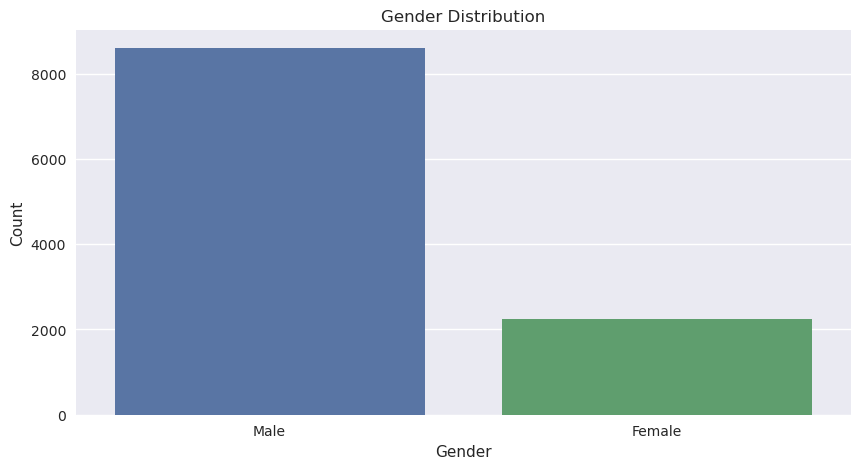

In [109]:
# Code Block 08
# Create count plot for gender distribution within the dataset

plt.figure(figsize=(10, 5)) 
ax = sns.countplot(x= 'sex', data=df_cvpf)
# Add labels and title

plt.xlabel("Gender")  # Label for the x-axis
plt.ylabel("Count")   # Label for the y-axis
plt.title("Gender Distribution")  # Title of the plot

# Display the plot
plt.show()

In [111]:
#Code Block 11
#Juvenile Felony counts grouped by gender

juvenile_felony_counts_by_gender = df_cvpf.groupby('sex')['juv_fel_count'].value_counts()
df_juv_fel_gen = pd.DataFrame(juvenile_felony_counts_by_sex).reset_index()

df_juv_fel_gen.head()

,sex,juv_fel_count
0,Female,30
1,Male,618


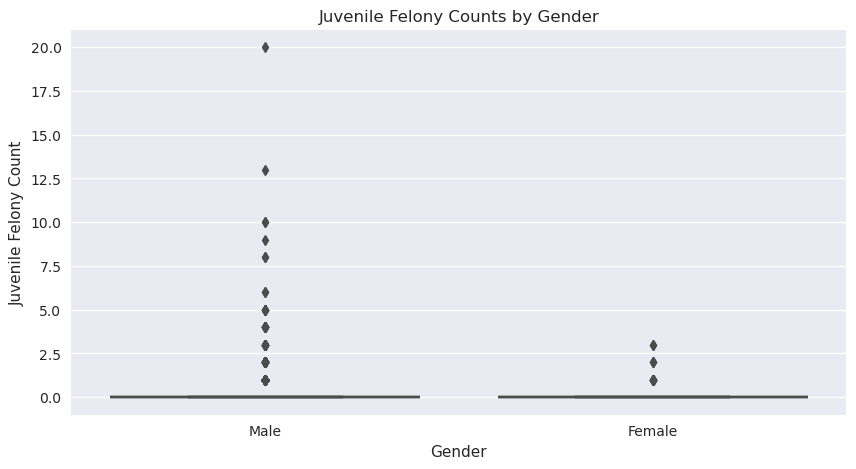

In [113]:
#Code Block 12
#Use boxplots to show how juvenile felony counts vary by gender. 

plt.figure(figsize=(10, 5))
sns.boxplot(x="sex", y="juv_fel_count", data=df_cvpf)

# Create labels for the plot
plt.title("Juvenile Felony Counts by Gender")
plt.xlabel("Gender")
plt.ylabel("Juvenile Felony Count")

# Show the plot
plt.show()

In [115]:
#Code Block 13
#Grouping violent recidivism rates by gender and creating a new dataframe
df_vrecid_gender = df_cvpf.groupby('sex')['is_violent_recid'].mean().reset_index()
df_vrecid_gender.head()

,sex,is_violent_recid
0,Female,0.046646
1,Male,0.081822


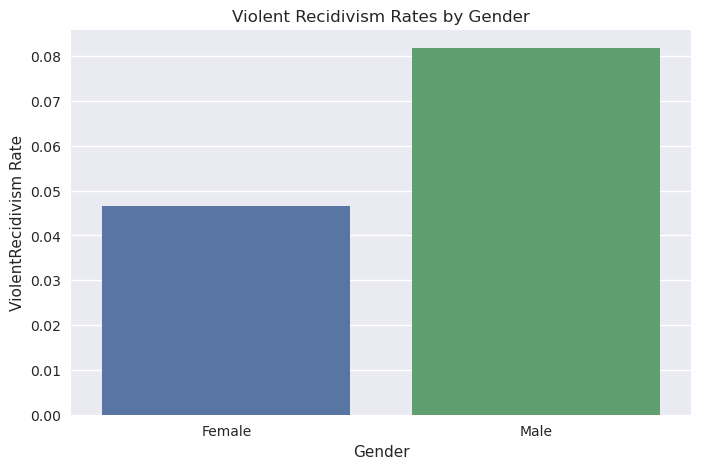

In [117]:
# Creating the bar plot for recidivism rates by gender

plt.figure(figsize=(8, 5))
sns.barplot(x='sex', y='is_violent_recid', data=df_vrecid_gender)
plt.title('Violent Recidivism Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('ViolentRecidivism Rate')

plt.show()

## Summary of Gender Related Trends

- Calculate the percentage of each gender and check for any disproportionate representation
  - The gender representation in this data set is highly disproportionate with 79% being male and only 21% being female
  - This raises the first concern that the baseline representation creates gender bias from the start
  - 
Uinge bo xplots to show how juvenile felony counts vary by gende
  - While it is difficult to see anything within the normal distribution of this plot. The outliers are extremely evident. Again, we can see additional disproportionality of information based on gender. Males not only have higher counts of juvenile felonies but some of those in this plot show counts well outside of the normal normal distribution. This may lead to the conclusion that  males have many more juvenile felonies than women.
    
- The total number of those with juvenile felony counts is relatively low compared to juvenile felony counts for everyone in the data set 648/10855=6%
the percentage of males with juvenile felony counts accounts for almost 100% of that percentage
618/10855= 6% 30/10855= 0.3%
  - 95% of those with juvenile felony counts were men compared to only 5% of females with juvenile felony counts

- When viewing e rates of violent recidivism based on gend it is found within this data that:
  - The rate for violent recidivism was calculate at almost double for men at 8% and women at 5%e  - This discrepancy is further highlighted through the u
Uof se bar plvisualization
t- What does this mean?
  - The data in this set is overwhelming skewed towards men
  - Even without additional machine training, one may already be led to believe that men are by and large the criminals of our society. Not only are they criminal, but their patterns of behavior begin in their youth and carry over into acts of violent recidivism. set.
